In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

sns.set()

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.rename(columns={'0':'label'},inplace=True)

In [3]:
X = data.drop('label',axis=1)
y = data['label']

In [4]:
print('Shape of training data: ',X.shape)
print('784 = 28 x 28')

X.head()

Shape of training data:  (372450, 784)
784 = 28 x 28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


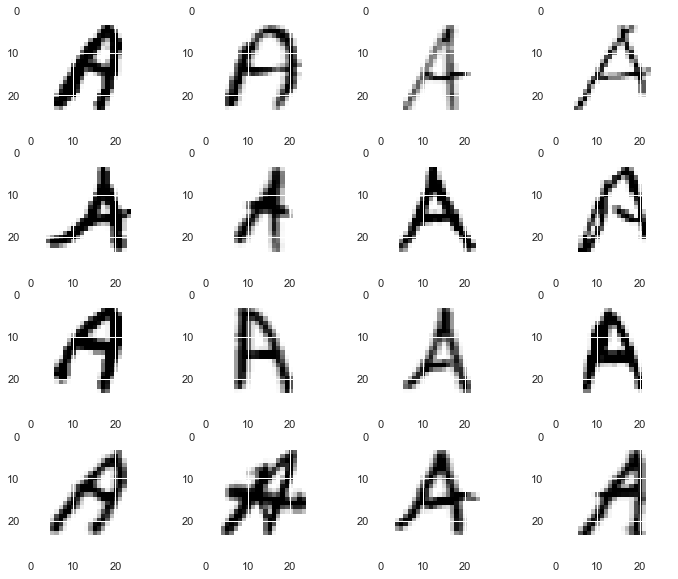

In [5]:
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


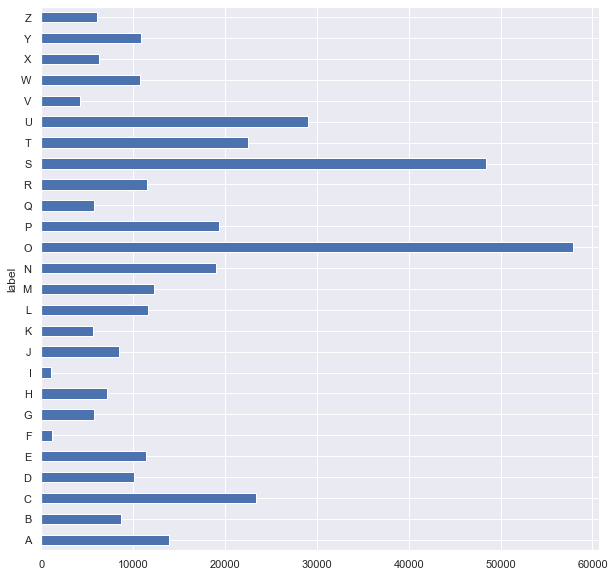

We have very low observations for I and F 
I count: 1120
F count: 1163


In [6]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
data['label'] = data['label'].map(alphabets_mapper)

dataset = data.copy()
label_size = data.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=18, batch_size=200, verbose=2)

scores = model.evaluate(X_test,y_test)
print('Score for the CNN: ',scores[1])

Epoch 1/18
1490/1490 - 126s - loss: 0.2198 - accuracy: 0.9394 - val_loss: 0.0827 - val_accuracy: 0.9769 - 126s/epoch - 84ms/step
Epoch 2/18
1490/1490 - 137s - loss: 0.0838 - accuracy: 0.9762 - val_loss: 0.0644 - val_accuracy: 0.9818 - 137s/epoch - 92ms/step
Epoch 3/18
1490/1490 - 135s - loss: 0.0629 - accuracy: 0.9821 - val_loss: 0.0560 - val_accuracy: 0.9844 - 135s/epoch - 90ms/step
Epoch 4/18
1490/1490 - 136s - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0491 - val_accuracy: 0.9865 - 136s/epoch - 92ms/step
Epoch 5/18
1490/1490 - 129s - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0429 - val_accuracy: 0.9884 - 129s/epoch - 86ms/step
Epoch 6/18
1490/1490 - 124s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0400 - val_accuracy: 0.9894 - 124s/epoch - 83ms/step
Epoch 7/18
1490/1490 - 123s - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0367 - val_accuracy: 0.9907 - 123s/epoch - 83ms/step
Epoch 8/18
1490/1490 - 122s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0330 - val_accuracy: 

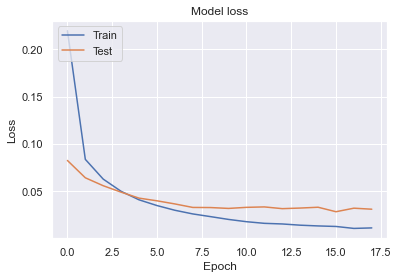

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()